# Porównanie modeli

Wczytanie modeli

In [1]:
import joblib
import MyHeurstic as mh
import tensorflow as tf
from warnings import simplefilter

simplefilter(action='ignore', category=UserWarning)

model_names = [ "Heuristic", "SVC", "LD", "Tensor"]

labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

#Nasz strategia
heuristic = mh.my_heuristic

#Model SVC
svc = joblib.load("ModelSVC.sav")

#Model Linear Discriminant
lin = joblib.load("ModelLinearDiscriminant.sav")

#Model Tensor
tensor = tf.keras.models.load_model('ModelNN/ModelNN')

Wczytanie danych

In [2]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)


Wilderness_Area = [
    "Rawah",
    "Neota",
    "Comanche Peak",
    "Cache la Poudre"
]

Soil_Type = np.arange(1, 41).astype(str)

Soil_Type = np.char.add("Soil_type_", Soil_Type)

names = ["Elevation",
         "Aspect",
         "Slope",
         "Horizontal_Distance_To_Hydrology",
         "Vertical_Distance_To_Hydrology",
         "Horizontal_Distance_To_Roadways",
         "Hillshade_9am",
         "Hillshade_Noon",
         "Hillshade_3pm",
         "Horizontal_Distance_To_Fire_Points"]

names = np.concatenate([names, Wilderness_Area, Soil_Type, ["Cover_Type"]])
data = ps.read_csv("covtype.data", sep=",", header=0, names=names)
x = data.drop(["Cover_Type"], axis=1)
y_exp = data["Cover_Type"]

***
## Predykcja dla poszczególnych modeli

In [3]:
y_heuristic = heuristic.predict(x)
y_svc = svc.predict(x)
y_lin = lin.predict(x)
#Tensor nam zwraca prawdopodobieństwo labeli w dodatku jeszcze numerując je od 0
y_tensor = np.argmax(tensor.predict(x), 1) + 1

***
## Accuracy score

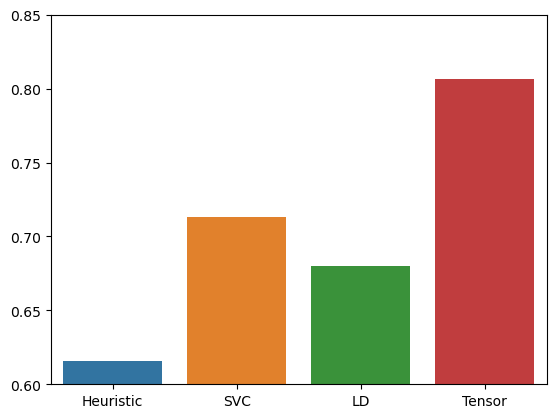

In [4]:
from sklearn import  metrics
accuracy_score_heursitc = metrics.accuracy_score(y_exp, y_heuristic)
accuracy_score_svc = metrics.accuracy_score(y_exp, y_svc)
accuracy_score_lin = metrics.accuracy_score(y_exp, y_lin)
accuracy_score_tensor = metrics.accuracy_score(y_exp, y_tensor)

sns.barplot(x=model_names, y=[accuracy_score_heursitc, accuracy_score_svc, accuracy_score_lin, accuracy_score_tensor])
plt.ylim(0.6, 0.85)
plt.show()

Jak możemy zauważyć sieć neuronowa ma zdecydowanie lepszy wynik w teście ogólnym. Za nią są modele SVC i LD, między którymi różnica to zaledwie kilka punktów procentowych. Najgorszym modelem bez dyskusji jest zbudowany przez nas algorytm

***
## Predcit i recall

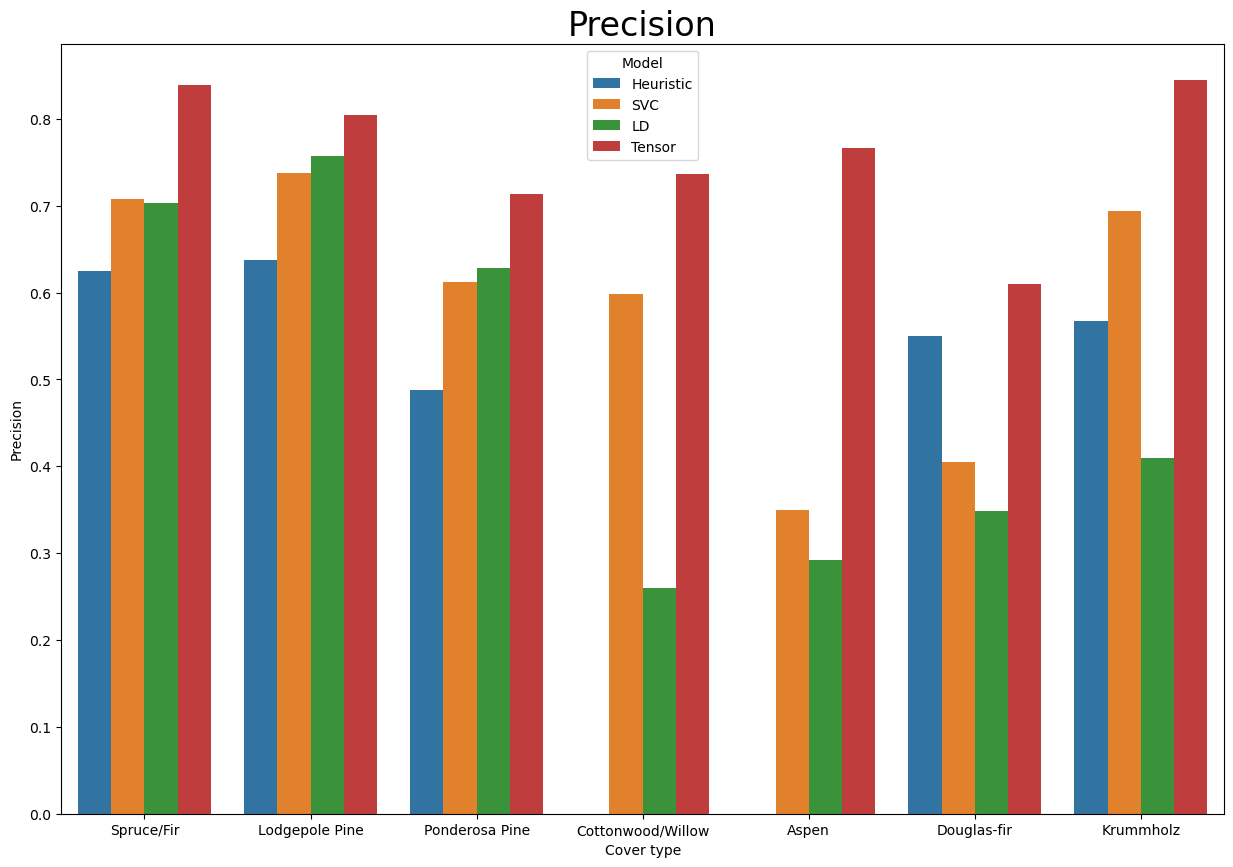

In [5]:
precision_scores_heursitc = metrics.precision_score(y_exp, y_heuristic, average=None)
precision_scores_svc = metrics.precision_score(y_exp, y_svc, average=None)
precision_scores_lin = metrics.precision_score(y_exp, y_lin, average=None)
precision_scores_tensor = metrics.precision_score(y_exp, y_tensor, average=None)

precision_scores = {"Cover type": labels,
        "Heuristic": precision_scores_heursitc,
        "SVC": precision_scores_svc,
        "LD": precision_scores_lin,
        "Tensor": precision_scores_tensor}
precision_scores = ps.DataFrame(precision_scores)
precision_scores = precision_scores.melt(id_vars=['Cover type'], var_name='Model', value_name='Precision')

plt.figure(figsize=(15, 10))
sns.barplot(x='Cover type', y='Precision', hue='Model', data=precision_scores, ci=None)
plt.title("Precision", fontsize = 24)
plt.show()

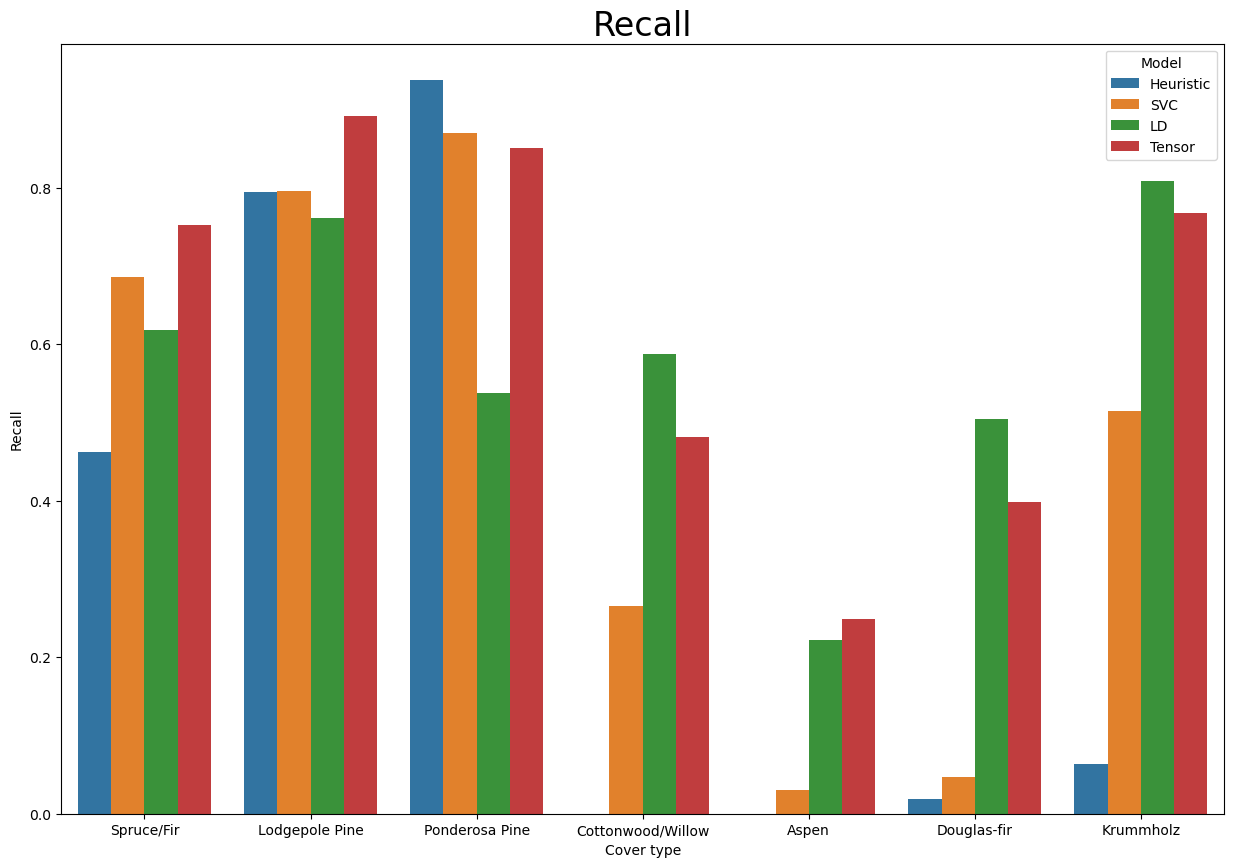

In [6]:
recall_scores_heursitc = metrics.recall_score(y_exp, y_heuristic, average=None)
recall_scores_svc = metrics.recall_score(y_exp, y_svc, average=None)
recall_scores_lin = metrics.recall_score(y_exp, y_lin, average=None)
recall_scores_tensor = metrics.recall_score(y_exp, y_tensor, average=None)

recall_scores = {"Cover type": labels,
        "Heuristic": recall_scores_heursitc,
        "SVC": recall_scores_svc,
        "LD": recall_scores_lin,
        "Tensor": recall_scores_tensor}
recall_scores = ps.DataFrame(recall_scores)
recall_scores = recall_scores.melt(id_vars=['Cover type'], var_name='Model', value_name='Recall')

plt.figure(figsize=(15, 10))
sns.barplot(x='Cover type', y='Recall', hue='Model', data=recall_scores, ci=None)
plt.title("Recall", fontsize = 24)
plt.show()

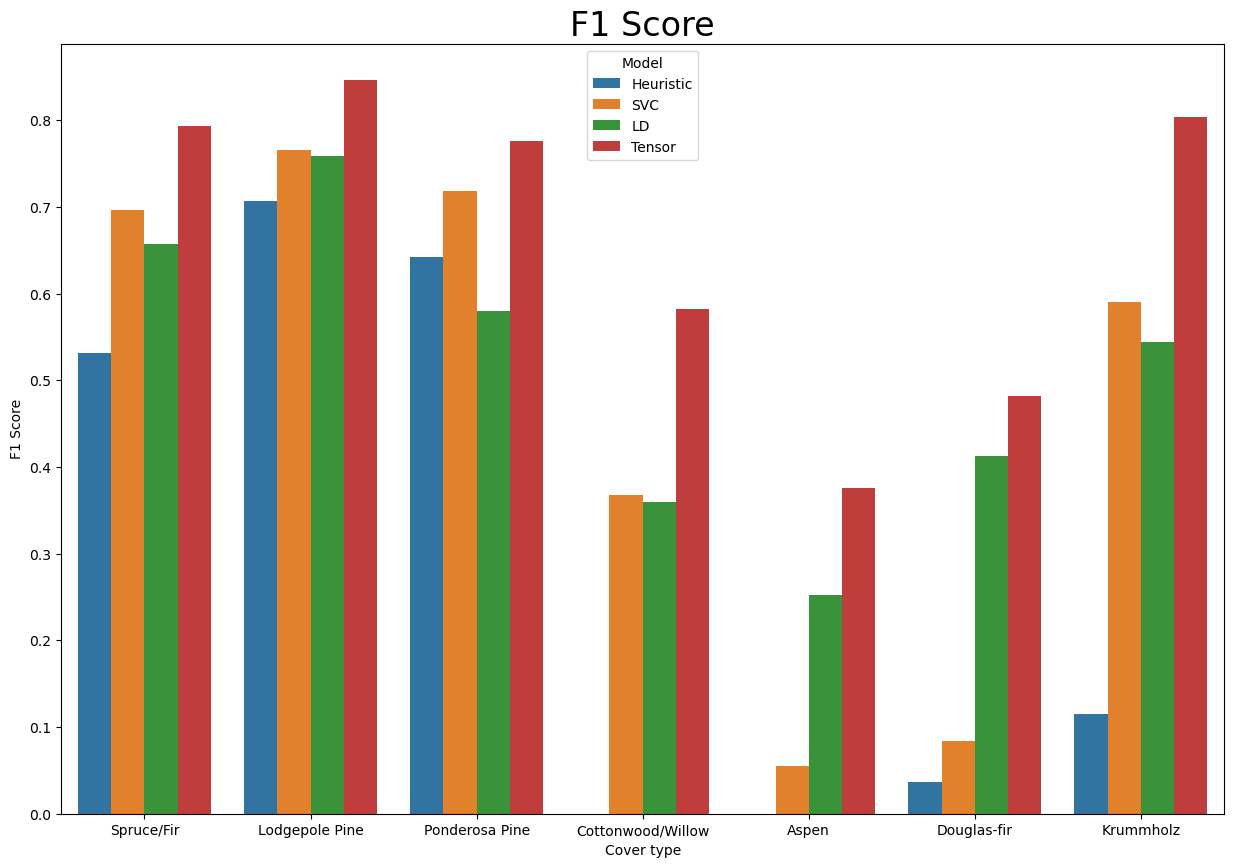

In [8]:
f1_scores_heursitc = metrics.f1_score(y_exp, y_heuristic, average=None)
f1_scores_svc = metrics.f1_score(y_exp, y_svc, average=None)
f1_scores_lin = metrics.f1_score(y_exp, y_lin, average=None)
f1_scores_tensor = metrics.f1_score(y_exp, y_tensor, average=None)

f1_scores = {"Cover type": labels,
        "Heuristic": f1_scores_heursitc,
        "SVC": f1_scores_svc,
        "LD": f1_scores_lin,
        "Tensor": f1_scores_tensor}
f1_scores = ps.DataFrame(f1_scores)
f1_scores = f1_scores.melt(id_vars=['Cover type'], var_name='Model', value_name='F1 Score')

plt.figure(figsize=(15, 10))
sns.barplot(x='Cover type', y='F1 Score', hue='Model', data=f1_scores, ci=None)
plt.title("F1 Score", fontsize = 24)
plt.show()

## Podsumowanie

Nasza sieć neuronowa jest wyraźnie lepsza od innych modeli. Dla każdego labelu odznacza się wysoką precyzją - nawet dla danych bardzo rzadko wysępujących. Z recallem przewaga sieci neuronoewj nie jest tak wyraźna, ale nadal dla najważniejszych labeli - 1 i 2 - nasza sieć neuronowa ma najlepszy wynik.